<h1>Linear Regression</h1>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

<h2>Simple Linear Regression</h2>

In [2]:
df = pd.read_csv("salary_data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [5]:
salary = df["Salary"]
years_experience = df["YearsExperience"]

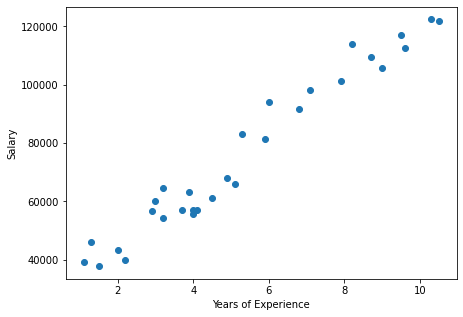

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(years_experience, salary)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.savefig("scatter.png", dpi=80)

In [7]:
X = np.array(years_experience).reshape(-1, 1)
y = np.array(salary)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [9]:
lr = LinearRegression().fit(X_train,y_train)

In [10]:
print("Intercept = ", lr.intercept_)
print("Slope = ", lr.coef_)

Intercept =  26777.391341197625
Slope =  [9360.26128619]


In [11]:
y_pred = lr.predict(X_test)

In [12]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,37731,40817.783270
1,122391,123188.082589
2,57081,65154.462615
3,63218,63282.410357
4,116969,115699.873560
5,109431,108211.664531
6,112635,116635.899689
7,55794,64218.436486
8,83088,76386.776158


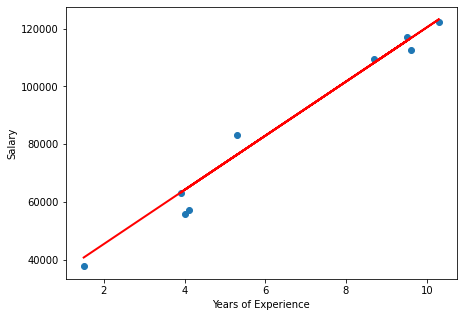

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="red", linewidth=2)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.savefig("scatter_reg.png", dpi=80)

In [14]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred)) 
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared Score: ", metrics.r2_score(y_test, y_pred))

Mean Squared Error: 23370078.800832972
Mean Absolute Error:  3737.417861878896
Root Mean Squared Error:  4834.260936361728
R-Squared Score:  0.9740993407213511


<h2>Multiple Linear Regression</h2>

In [15]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


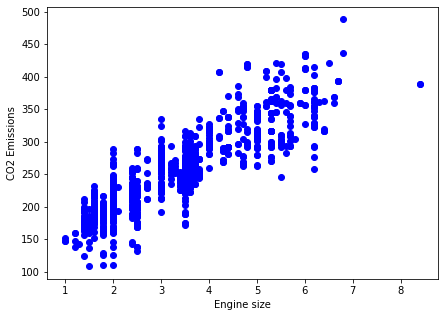

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emissions")
plt.savefig("scatter_engsiz.png", dpi=80)

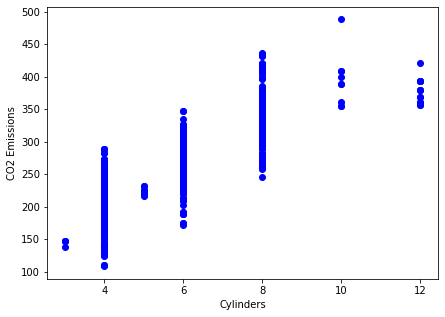

In [18]:
plt.figure(figsize=(7, 5))
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.savefig("scatter_cilinders.png", dpi=80)

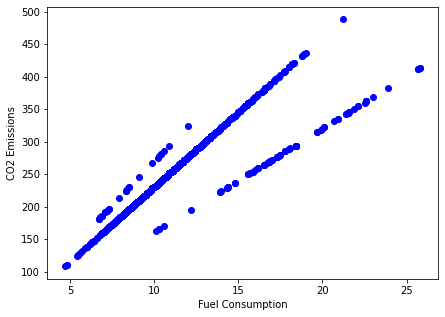

In [19]:
plt.figure(figsize=(7, 5))
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.savefig("scatter_fuelcons.png", dpi=80)

In [20]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [21]:
X_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
lr.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print ("Intercept: ", lr.intercept_)
print ("Coefficients: ", lr.coef_)

Intercept:  [68.11319869]
Coefficients:  [[10.59073648  8.22945529  9.0795442 ]]


In [23]:
y_pred= lr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
X_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

In [24]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred)) 
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared Score: ", metrics.r2_score(y_test, y_pred))

Mean Squared Error: 464.6018329932227
Mean Absolute Error:  15.435748790645803
Root Mean Squared Error:  21.55462439926112
R-Squared Score:  0.8958754186223651
